In [1]:
import pandas as pd

pd.options.display.float_format = '{:20,.2f}'.format

RENT = 1100
EXPENDABLE_INCOME = 2000
TAXES_PCT = 1
INTEREST_RATE_PCT = 3
RESERVES_PCT = 1
PROPERTY_BUY_VALUE = 500000
CAPTIAL = 100000
BUY_VALUE = 500000
EXPECTED_STOCK_MARKET_RETURNS = 0.05
EXPECTED_HOUSING_MARKET_RETURNS = 0.03


def buy_by_year(year):
    #-CAPTIAL + 
    return year ** 2


def calc_rent_stock_returns(year, captial, exp_stock_returns, expendable_income, rent):
    return captial * (1.05 ** year)  # TODO plus monatliches investment von EXPENDABLE INCOME - RENT


def calc_rent_spent(year, rent):
    return rent * 12 * year * -1


def calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital,
               avg_stock_market_returns, avg_housing_market_returns):
    rentAmounts = []
    rentSpentAmounts = []
    rentStockReturnsAmounts = []
    buyAmounts = []
    for year in range(0, max_year):  #this is probaby slow. Can probably be faster directly in pandas
        rent_stock_return = calc_rent_stock_returns(year, capital, avg_stock_market_returns, expendable_income, rent)
        rent_spent = calc_rent_spent(year, rent)
        rentSpentAmounts.append(rent_spent)
        rentStockReturnsAmounts.append(rent_stock_return)
        rentAmounts.append(rent_stock_return + rent_spent)
        buyAmounts.append(buy_by_year(year))

    return pd.DataFrame({'buy': buyAmounts, 'rent': rentAmounts, 'rent_spent': rentSpentAmounts,
                         'rent_stock_returns': rentStockReturnsAmounts})

In [4]:
import matplotlib.pyplot as plt

from matplotlib.figure import Figure


def plot(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital,
         avg_stock_market_returns, avg_housing_market_returns):
    df = calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital,
                    avg_stock_market_returns, avg_housing_market_returns)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    plt.plot(df["rent"], label="rent")
    plt.plot(df["rent_spent"], label="rent spent")
    plt.plot(df["rent_stock_returns"], label="rent stock returns")
    plt.ticklabel_format(style='plain')
    plt.legend()
    return fig

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=60, name='max_year', value=30)
            [1] IntSlider(end=3000, name='rent', start=800, step=50, value=1100)
            [2] IntSlider(end=3000, name='expendable_income', start=1500, step=100, value=2000)
            [3] FloatSlider(end=0.30000000000000004, name='taxes', start=-0.1, value=0.1)
            [4] FloatSlider(end=0.8999999999999999, name='interest_rate', start=-0.3, value=0.3)
            [5] FloatSlider(end=0.30000000000000004, name='reserves_per_year', start=-0.1, value=0.1)
            [6] IntSlider(end=1500000, name='property_value', start=250000, step=10000, value=500000)
            [7] IntSlider(end=500000, name='capital', start=50000, step=10000, value=100000)
            [8] FloatSlider(end=1.5, name='avg_stock_market_returns'..., start=-0.5, value=0.5)
            [9] FloatSlider(end=0.8999999999999999, name='avg_housing_market_return..., start=-0.3, value=0.3)
        [1] Row
            [0] Matplotlib(Figure, height=1080, name='interactive00135', width=1080)
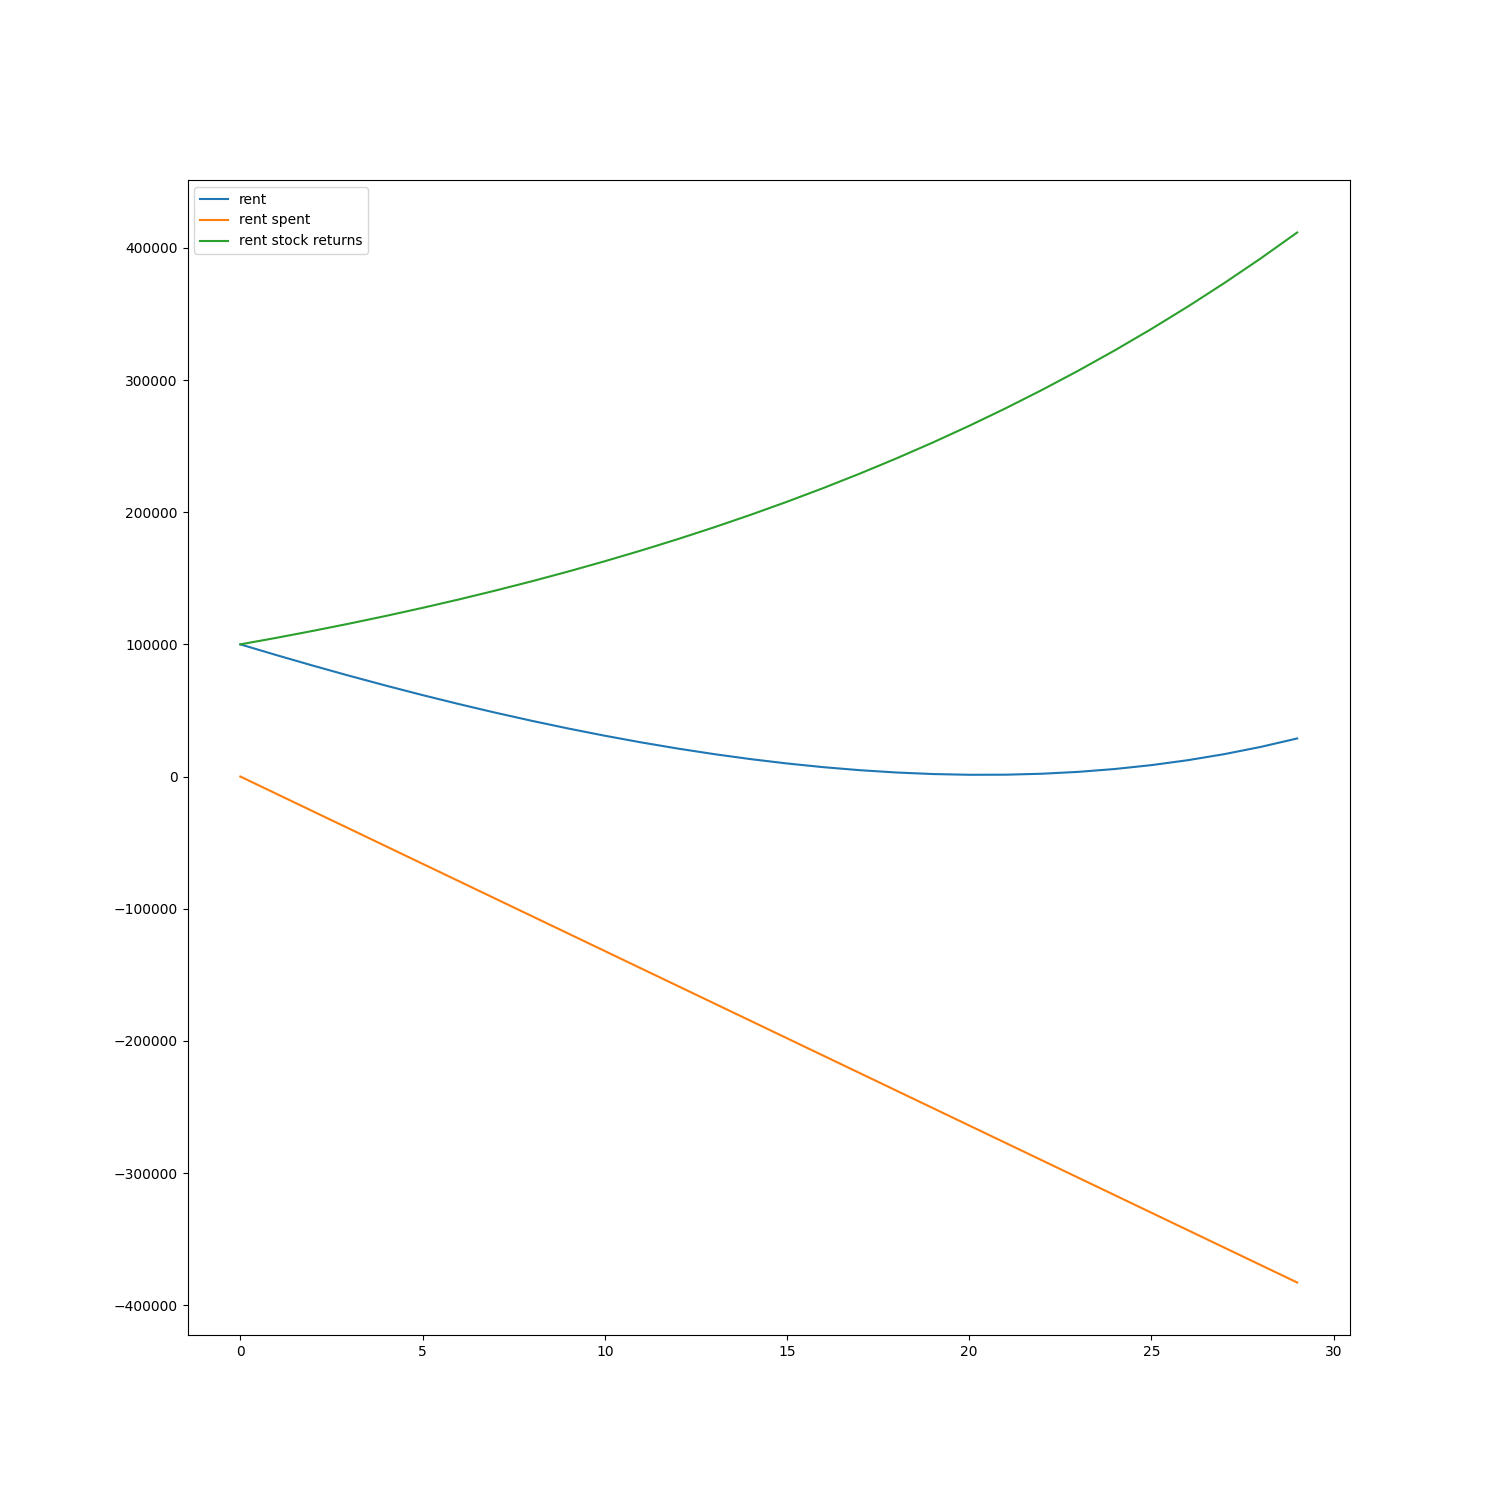

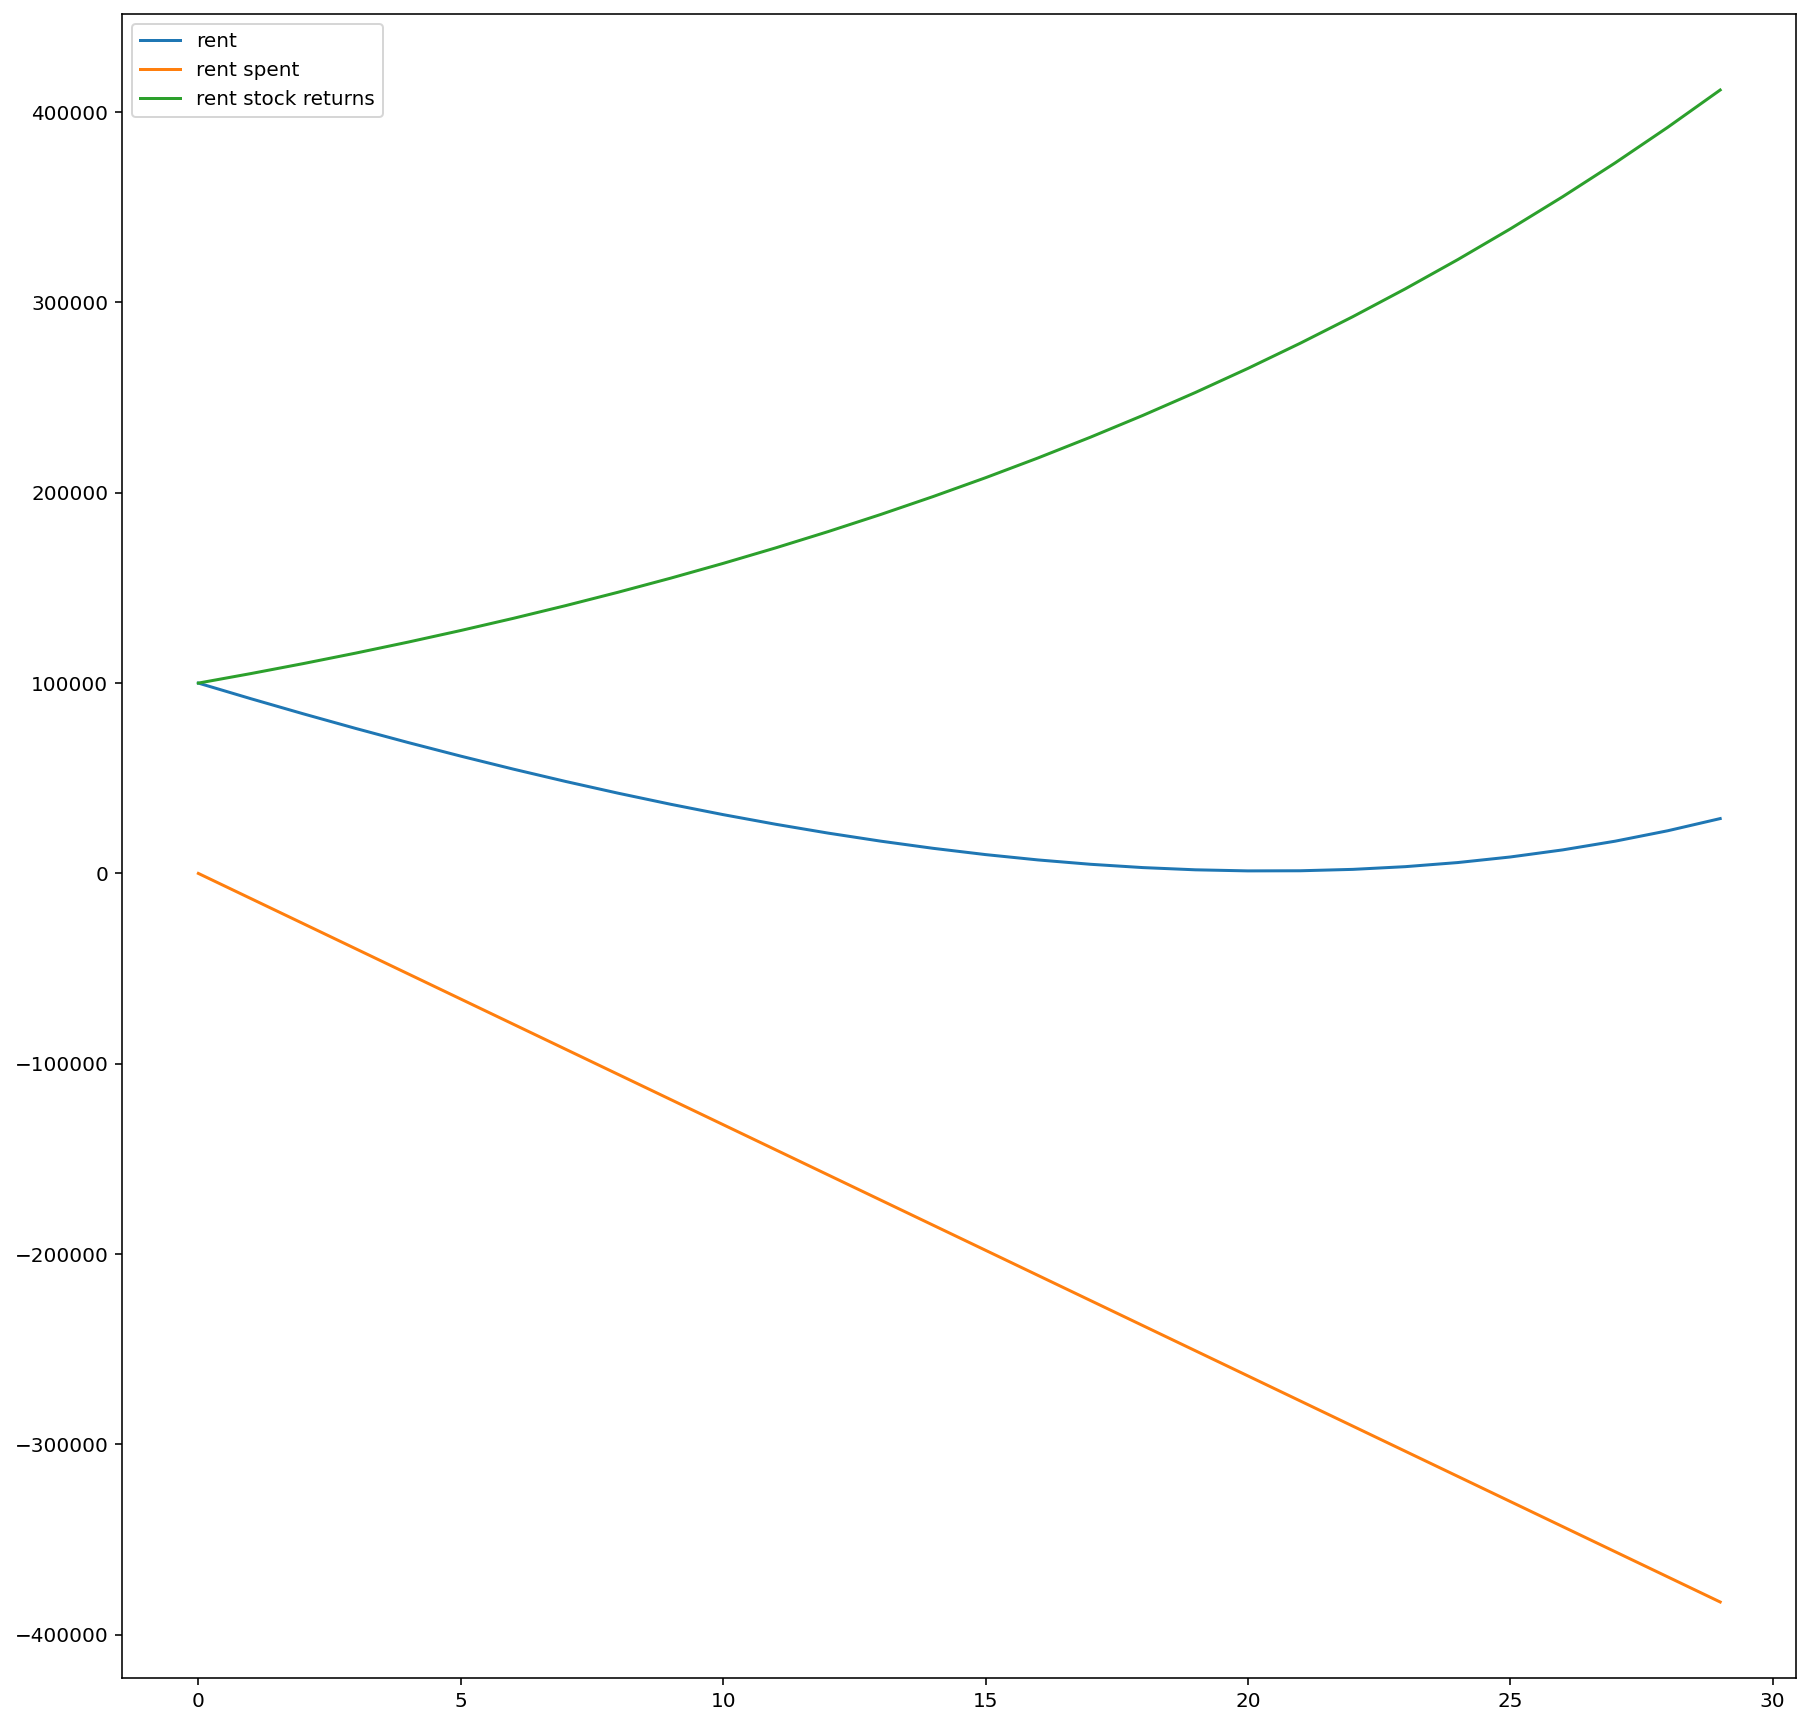

In [5]:
import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

layout = interact(plot, max_year=(0, 60, 1, 30), rent=(800, 3000, 50, 1100), expendable_income=(1500, 3000, 100, 2000),
                  taxes=0.1, interest_rate=0.3, reserves_per_year=0.1, property_value=(250000, 1500000, 10000, 500000),
                  capital=(50000, 500000, 10000, 100000), avg_stock_market_returns=0.5, avg_housing_market_returns=0.3)

pn.Column('Buy vs rent over time', pn.Row(layout[0], layout[1]))